# 약간의 코드만 변경하면 학생들과 재미있게 활용 가능할 것 같다!
## 학생들의 서비스를 염두에 둔 배포 단계를 배워야 한다.

# Hello Image Classification

This basic introduction to OpenVINO™ shows how to do inference with an image classification model.

A pre-trained [MobileNetV3 model](https://github.com/openvinotoolkit/open_model_zoo/blob/master/models/public/mobilenet-v3-small-1.0-224-tf/README.md) from [Open Model Zoo](https://github.com/openvinotoolkit/open_model_zoo/) is used in this tutorial. For more information about how OpenVINO IR models are created, refer to the [TensorFlow to OpenVINO](../tensorflow-classification-to-openvino/tensorflow-classification-to-openvino.ipynb) tutorial.



### 이미지 분류

In [1]:
from pathlib import Path

import cv2
import matplotlib.pyplot as plt
import numpy as np
import openvino as ov

### AI 추론을 실행할 디바이스 선택

In [2]:
import openvino as ov
core = ov.Core()
options=core.available_devices

options

['CPU', 'GPU.0', 'GPU.1']

### 2.AI 모델 불러오기 및 입출력 형태 확인

In [3]:
core = ov.Core()
model = core.read_model(model='./models/v3-small_224_1.0_float.xml')

# 아래 코드가 중요! (사용할 모델과 장치를 선택하는 코드)
compiled_model = core.compile_model(model=model, device_name="CPU")

input_layer = compiled_model.input()
output_layer = compiled_model.output()

print("input_layer_shape:",input_layer.shape)
print("out_layer_shape:", output_layer.shape)

input_layer_shape: [1,224,224,3]
out_layer_shape: [1,1001]


### AI 추론 준비 : 데이터 전처리
- 데이터 전처리: 새로 입력될 데이터 입력 형태 맞추기 <br>
  input_layer_shape: [1,224,224,3]

image.shape:, (380, 568, 3)
resize_input_image.shape:, (224, 224, 3)
expand_dims_input_image.shape:, (1, 224, 224, 3)


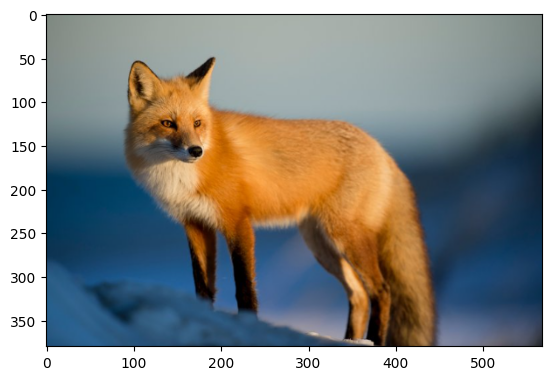

In [4]:
import cv2
import numpy as np
# AI 추론에 사용할 새로운 이미지 데이터 불러오기

image = cv2.cvtColor(cv2.imread('./data/fox.png'), code=cv2.COLOR_BGR2RGB)
print(f"image.shape:, {image.shape}")

# 입력된 새로운 이미지 데이터 크기를 AI 모델 입력 크기로 변환

input_image = cv2.resize(src=image, dsize=(224, 224))
print(f"resize_input_image.shape:, {input_image.shape}")


# AI 모델 입력 형태에 맞게 차원 확장 하기
input_image = np.expand_dims(input_image, 0)
print(f"expand_dims_input_image.shape:, {input_image.shape}")

#import matplotlib.pyplot as plt
plt.imshow(image);


## 4. AI 추론

- input_image
- compiled_model
- output_layer

In [5]:
# 이미지가 206번째 결과값에 근접했음을 의미

result_infer = compiled_model([input_image])[output_layer]
result_index = np.argmax(result_infer)
result_index

278

In [6]:
result_infer

array([[3.7268950e-05, 3.0617131e-05, 4.3341639e-05, ..., 3.0878873e-05,
        9.0311500e-05, 2.2261675e-05]], dtype=float32)

In [7]:
def compare_numbers(a, b):
    if a > b:
        return f"{a} is greater than {b}"
    elif a < b:
        return f"{b} is greater than {a}"
    else:
        return f"{a} is equal to {b}"

# 숫자 비교
num1 = 3.8589977e-05
num2 = 0.77001953

print(compare_numbers(num1, num2))

0.77001953 is greater than 3.8589977e-05


https://www.image-net.org/challenges/LSVRC/2012/browse-synsets.php

## 5. AI 추론 결과 출력



- 추론 결과 해석
- 추론 결과 출력

In [19]:
from pathlib import Path
imagenet_filename = Path('./data/imagenet_2012.txt')

print(imagenet_filename)

imagenet_classes = imagenet_filename.read_text().splitlines()

# print(imagenet_classes)

data\imagenet_2012.txt


In [20]:
# The model description states that for this model, class 0 is a background.
# Therefore, a background must be added at the beginning of imagenet_classes.

imagenet_classes = ["background"] + imagenet_classes
#print(imagenet_classes)
imagenet_classes[result_index]

 

'n02119022 red fox, Vulpes vulpes'

In [24]:
# imagenet_classes[:5]

In [22]:
# imagenet_classes[206]

## 배포하는 법 : Gradio(연구필요), 스트리밋?

In [25]:
import gradio as gr

In [28]:
# 데모 체험
# def greet(name, intensity):
#     return "Hello, " + name + "!" * int(intensity)

# demo = gr.Interface(
#     fn=greet,
#     inputs=["text", "slider"],
#     outputs=["text"],
# )

# demo.launch()

In [1]:
# 이미지 불러오고 / 분석하기
import openvino as ov
import cv2
import numpy as np
import PIL
from pathlib import Path

# Load the model and prepare the input/output layers
core = ov.Core()
model = core.read_model(model='models/v3-small_224_1.0_float.xml')
compiled_model = core.compile_model(model=model, device_name="CPU")
input_layer = compiled_model.input(0)
output_layer = compiled_model.output(0)

# Load ImageNet classes
imagenet_filename = Path('data/imagenet_2012.txt')
imagenet_classes = imagenet_filename.read_text().splitlines()
imagenet_classes = ["background"] + imagenet_classes

# Include the background class

def preprocess(image):
    # Convert the PIL image to a NumPy array and resize to 224x224
    image = np.array(image)  # Convert PIL image to numpy array
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)  # Convert RGB to BGR for OpenCV
    input_image = cv2.resize(src=image, dsize=(224, 224))
    input_image = np.expand_dims(input_image, axis=0)  # Add batch dimension
    return input_image 

def predict_image(image):
    input_image = preprocess(image)  # Preprocess the image
    result_infer = compiled_model([input_image])[output_layer]  # Perform inference
    result_index = np.argmax(result_infer)  # Get the index of the highest score
    
    # Get the predicted class name
    predicted_class = imagenet_classes[result_index]
    return predicted_class  # Return just the predicted class name


In [4]:
import gradio as gr

# Set up the Gradio interface
gr.Interface(fn=predict_image,
             inputs=gr.Image(type="pil"),
             outputs=gr.Textbox(),
             examples=["./data/coco.jpg"]).launch()

# Use Textbox to show the predicted class

Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.
